# Capstone Project 3

## Machine Learning - Credit Card Fraud Detection by Classification

To: Magnimind Academy

From: Sammi C

Date of Submission: 22.01.2023

## Credit Card Fraud Detection

### Introduction
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


### Dataset Description
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


### Columns Description
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 


- 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

- 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


### Dataset

Dataset Source and information provided by Kaggle:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Methods
#### Supervised Learning Models

Types of Supervised Learning Techniques: 
1. Classification

output is having defined labels(discrete value)

- Support Vector Machines (SVM)
- Decision Trees
- K-Nearest Neighbor (KNN)
- Random Forest
- Logistical Regression

2. Regression  

output is having continuous value.

- Linear Regression
- Polynomial Regression

In [68]:
# import necessary libraries
!pip install -U imbalanced-learn

# EDA & Visualization
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

# ML - Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# imblanced datade
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### Importng dataset

In [2]:
# import dataset and read by pandas 
# create a copy, keep the original dateset safe
path = 'D:/online course/Magnimind academy/Full Data Bootcamp/CAPSTONE PROJECT-3/creditcard.csv'
user_churn = pd.read_csv(path)
df = user_churn.copy()

### Reading dataset

In [3]:
# check data format
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Data Wrangling/ Data Cleaning & EDA(Exploratory Data Analysis)

In [5]:
# check data index
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# check datatypes of all columns
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# check null numbers & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [77]:
# calculating some statistical data information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [9]:
# check null values
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
# check for total null values by columns
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# show the column with null value (NaN)
df.loc[df.isna().any(1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [12]:
# check how many columns & columns
df.shape

(284807, 31)

In [13]:
# check dimensions
df.ndim

2

In [14]:
# check how many unique samples in eaxh columns
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [15]:
# check duplicate
df.duplicated().sum()

1081

In [16]:
# delete duplicates
df_drop = df.copy()
df_drop.drop_duplicates(subset = None, inplace = True)

In [17]:
df_drop.shape

(283726, 31)

In [18]:
df = df_drop

In [19]:
df.shape

(283726, 31)

In [20]:
del df_drop

### Data Visualization

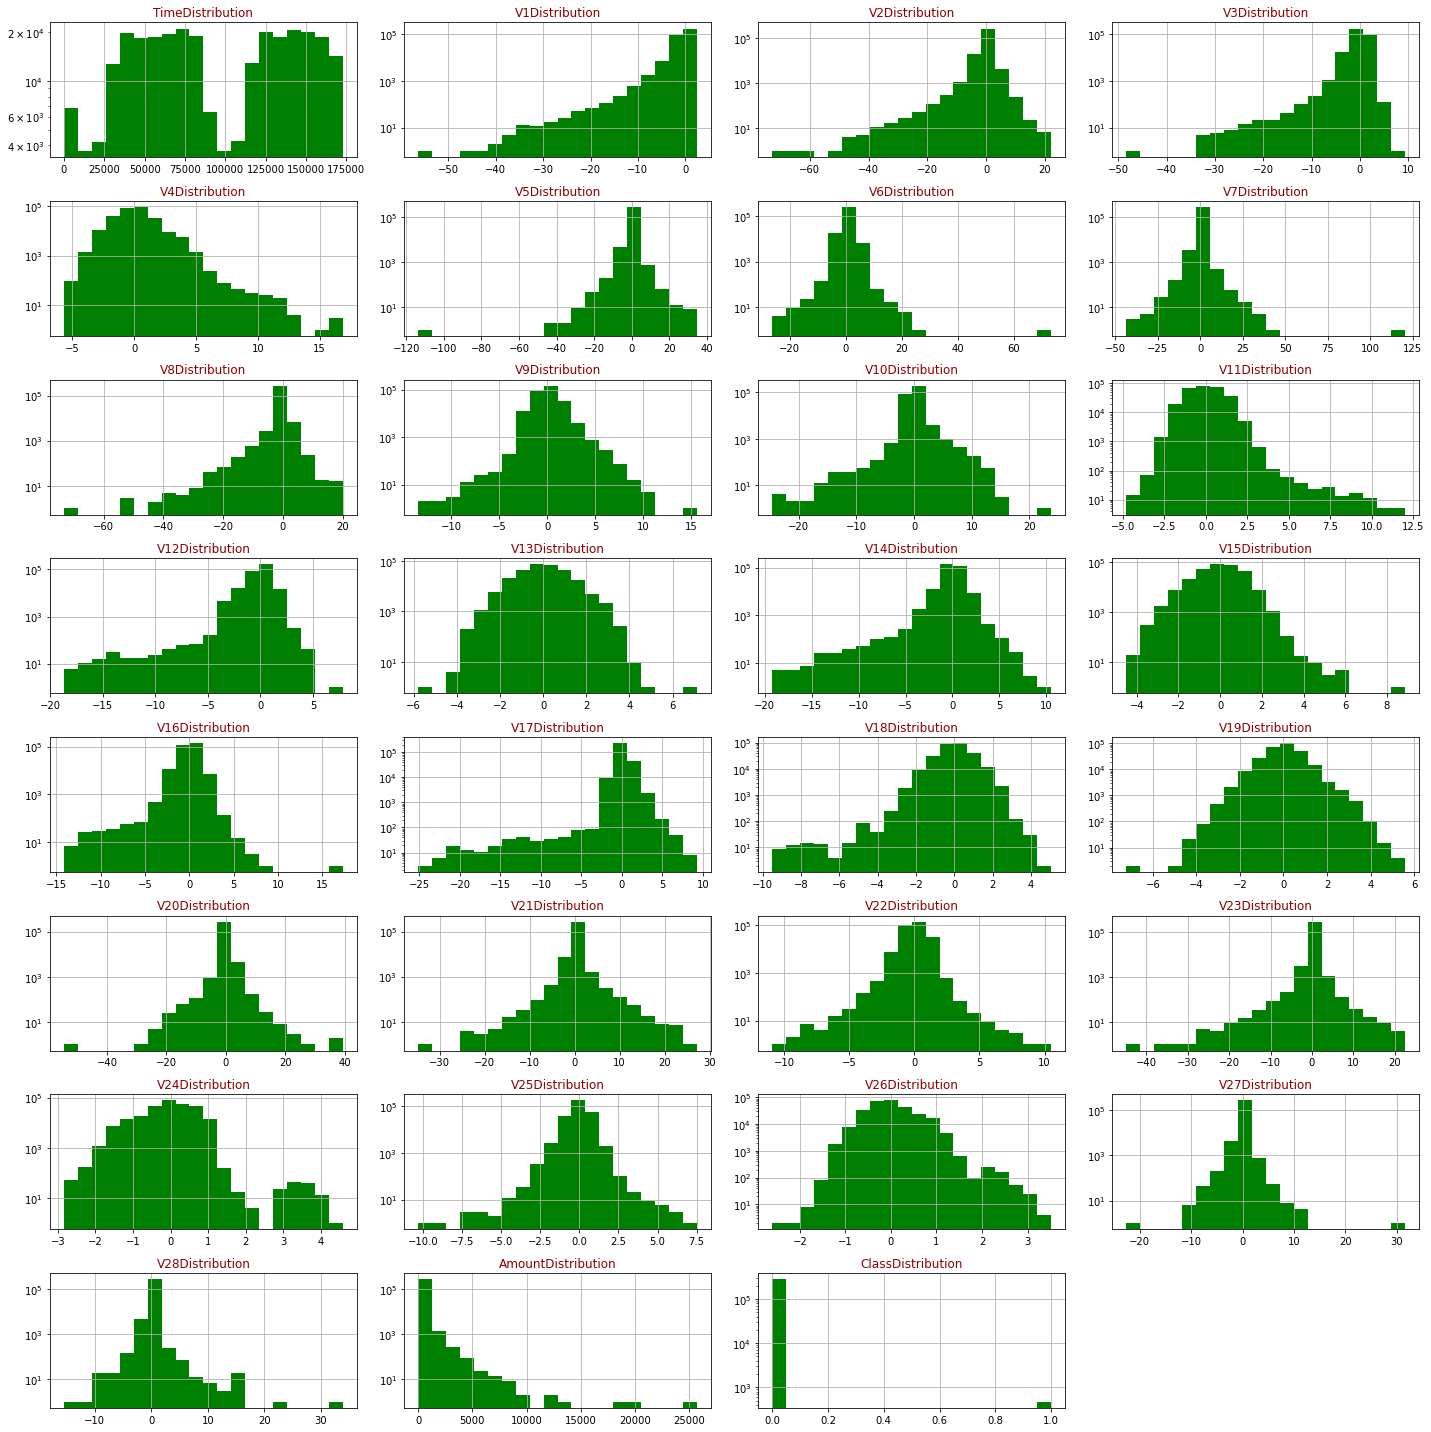

In [21]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'green')
        ax.set_title(feature +"Distribution", color = 'DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df, df.columns, 8, 4)

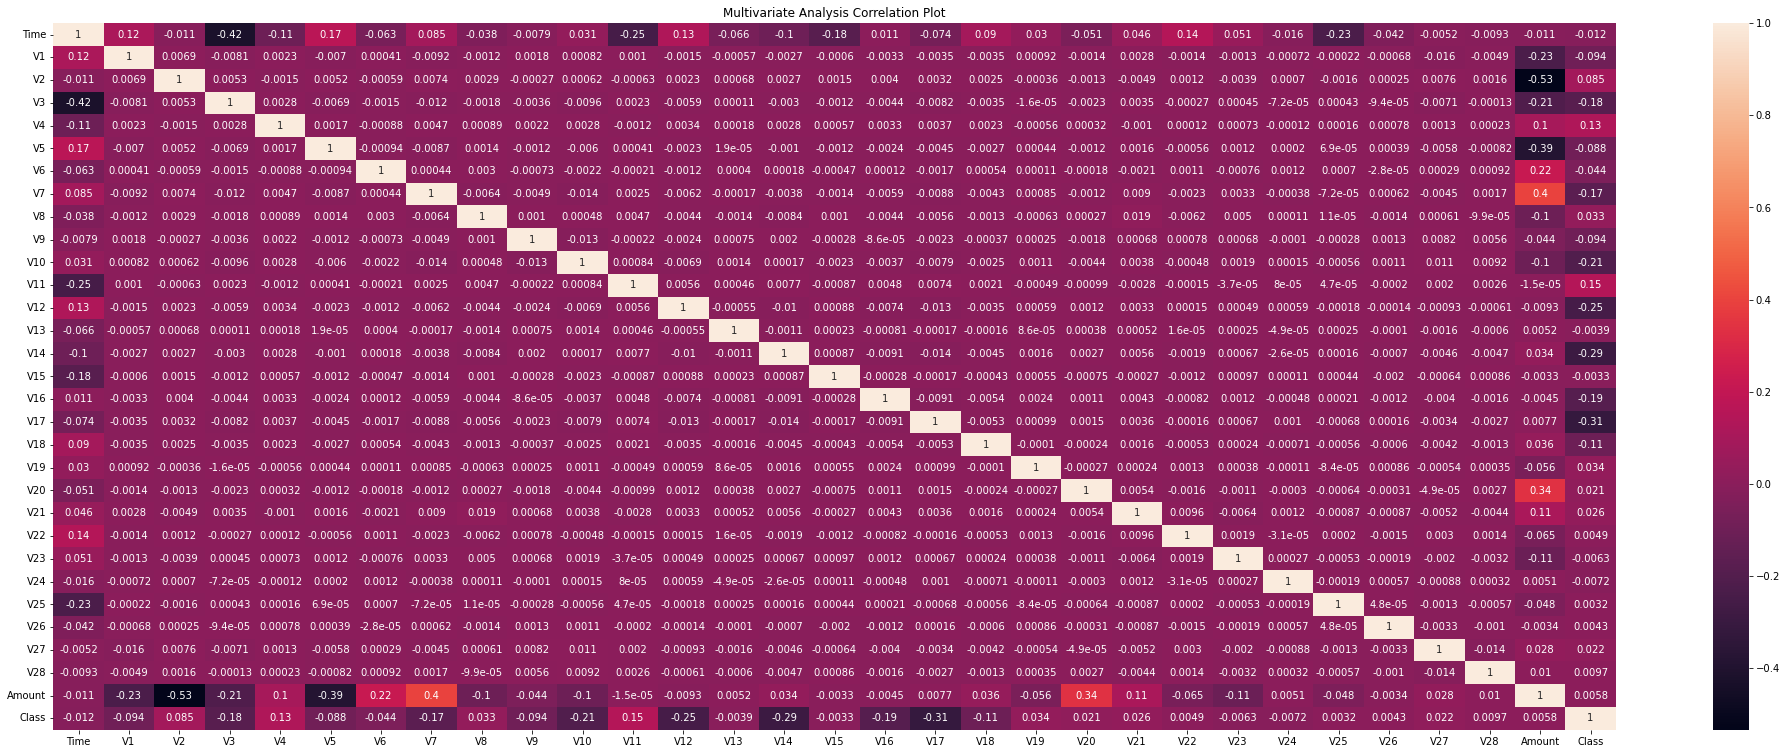

In [22]:
# Correlation Plot (Numerical Variable)
plt.figure(figsize = (35, 13))
plt.title('Multivariate Analysis Correlation Plot')
sns.heatmap(df.corr(), annot = True)
plt.show()

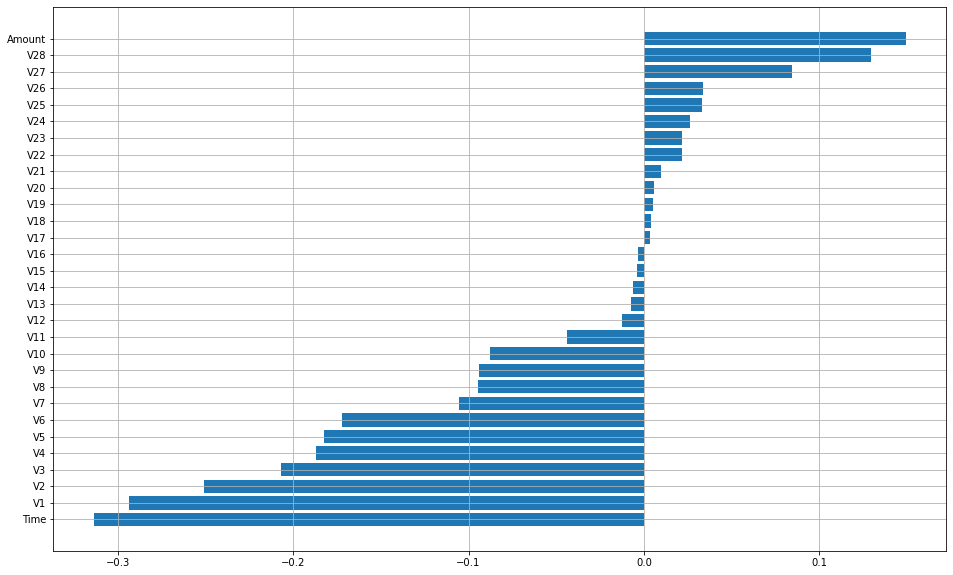

In [23]:
# Correlation between features and target
cols = df.describe().transpose().index
cols = cols.tolist()
cols.remove('Class')
corr_values = []
for i in cols:
    corr_values.append(np.corrcoef(df[i], df['Class'])[0,1])
corr_values.sort()
fig, ax = plt.subplots(figsize = (16,10))
ax.barh(cols,corr_values)
plt.grid(True)

In [24]:
# sum of the size of churned (true and false)
sum_churned = df['Class'].value_counts()
sum_churned

0    283253
1       473
Name: Class, dtype: int64

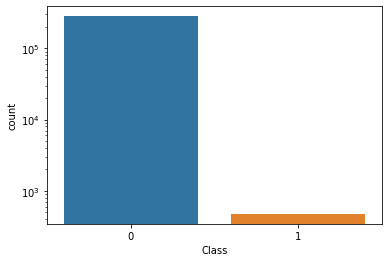

In [25]:
ax = sns.countplot(x = 'Class', data = df);
ax.set_yscale('log')

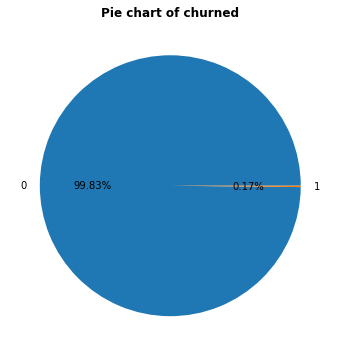

In [26]:
# pie chart of Class - Target
plt.figure(figsize=(8,6))
plt.pie(df.Class.value_counts(), autopct='%.2f%%', labels = df.Class.unique())
plt.title('Pie chart of churned', fontweight = 'bold')
plt.show()

### Supervised Learning - Classification

In [27]:
# target
y = df.Class.values

# data
X = df.drop(['Class'], axis = 1)

In [28]:
# Split the data into training and testing data
# 20% of the data for testing and 80% for training

X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state = 42, stratify=y, test_size=0.2)

In [32]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ypred_logreg = logreg.predict(X_test)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print('Mean-squared error using Logistic Regression:', mean_squared_error(y_test, ypred_logreg))
print('Accuracy with Logistic Regression:', accuracy_score(y_test, ypred_logreg))
print('Training Accuracy:', train_score)
print('Testing Accuracy:', test_score)

Mean-squared error using Logistic Regression: 0.0011278327987875798
Accuracy with Logistic Regression: 0.9988721672012124
Training Accuracy: 0.9989602608159309
Testing Accuracy: 0.9988721672012124


In [33]:
# Model accuracy, Accuracy of the model is 1

print(classification_report(y_test, ypred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.66      0.68      0.67        95

    accuracy                           1.00     56746
   macro avg       0.83      0.84      0.83     56746
weighted avg       1.00      1.00      1.00     56746



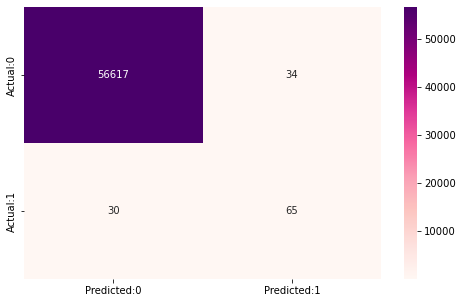

In [72]:
# confusion matrix
cm = confusion_matrix(y_test, ypred_logreg)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdPu');

## Models for unbalanced data

### - RandomOverSampler 

In [41]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 283253, 1: 283253})


In [42]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state = 10)

In [43]:
logreg.fit(X1_train, y1_train)
ypred_ros = logreg.predict(X1_test)

In [44]:
print(classification_report(y1_test, ypred_ros))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56729
           1       0.96      0.92      0.94     56573

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.94    113302
weighted avg       0.94      0.94      0.94    113302



### - RandomUnderSampling 

In [46]:
rus = RandomUnderSampler(random_state = 42, replacement=False)
x_rus, y_rus = rus.fit_resample(X, y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 473, 1: 473})


In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x_rus, y_rus, test_size=0.2,random_state = 10)

In [48]:
logreg.fit(X2_train, y2_train)
ypred_rus = logreg.predict(X2_test)

In [49]:
print(classification_report(y2_test, ypred_rus))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.94      0.92      0.93        91

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



### - SMOTE

In [50]:
smote = SMOTE()

In [52]:
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 283253, 1: 283253})


In [53]:
X3_train, X3_test, y3_train, y3_test = train_test_split(x_smote,y_smote, test_size=0.2, random_state = 10)

In [55]:
logreg.fit(X3_train, y3_train)
ypred_smote = logreg.predict(X3_test)

In [56]:
print(classification_report(y3_test, ypred_smote))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56729
           1       0.98      0.96      0.97     56573

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



From the above results, the precision and recall have good score as 0.95, 0.97 which is good when compared to under-sampling and no-sampling results.

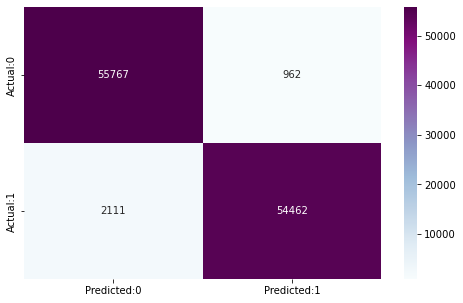

In [73]:
# confusion matrix
cm = confusion_matrix(y3_test, ypred_smote)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'BuPu');

### - GradientBoostingClassifier (using smote oversampling)

In [60]:
GBR = GradientBoostingClassifier(n_estimators = 50,  max_depth = 2).fit(X3_train, y3_train)

In [66]:
ypred_gbr = GBR.predict(X3_test)
recall_score(ypred_gbr, y3_test)

0.9862266491535319

In [67]:
print(classification_report(y3_test, ypred_gbr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     56729
           1       0.99      0.96      0.97     56573

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



## Facts

- Due to confidentiality issues, there are no more details of the features of the data

- highly unbalanced data in 'Class': 99.83% : 0.17%

## Conclusion of Supervised Learning Models

#### Logistic Regression
- Accuracy with Logistic Regression: 0.998

- classification_report:
By observing, the support for both the values 0 & 1 data is highly unbalanced.
- precision: 0.66
- recall: 0.68
- f1-score:  0.65
- support: 56651 : 95

confusion matrix (Logistic Regression)
- True Positives: 65
- True Negatives: 56617
- False Positives: 34 (Type I error)
- False Negatives: 30 ( Type II error)

#### RandomOverSampler
- precision: 0.96
- recall: 0.92
- f1-score:  0.94
- support: 56729 : 56573

#### RandomUnderSampling
- precision: 0.94
- recall: 0.92
- f1-score:  0.93
- support: 99: 91

#### SMOTE
- precision: 0.98
- recall: 0.96
- f1-score:  0.97
- support: 56729: 56573

confusion matrix (SMOTE)
- True Positives: 54462
- True Negatives: 55767
- False Positives: 962 (Type I error)
- False Negatives: 211 ( Type II error)

#### GradientBoostingClassifier (using smote oversampling)
- precision: 0.99
- recall: 0.96
- f1-score:  0.97
- support: 56729: 56573